In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [117]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), delimiter = ";")

In [126]:
df.head(10)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   
5                             0                      19   
6                             1                       1   
7                             1                       1   
8                             1                       1   
9                             1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   
5                           133.1            1                      37   
6                           142.0            1                      19   
7                           119.0            1                      37   
8                           137.0           62                       1   
9                           138.0            1                       1   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   
5                      37  ...                                    0   
6                      38  ...                                    0   
7                      37  ...                                    0   
8                       1  ...                                    0   
9                      19  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   
5                                    5   
6                                    8   
7                                    5   
8                                    6   
9                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grad

In [127]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%                        1.000000                1.000000   
50%                        1.000000                1.000000   
75%                        1.000000                1.000000   
max                        1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                           

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


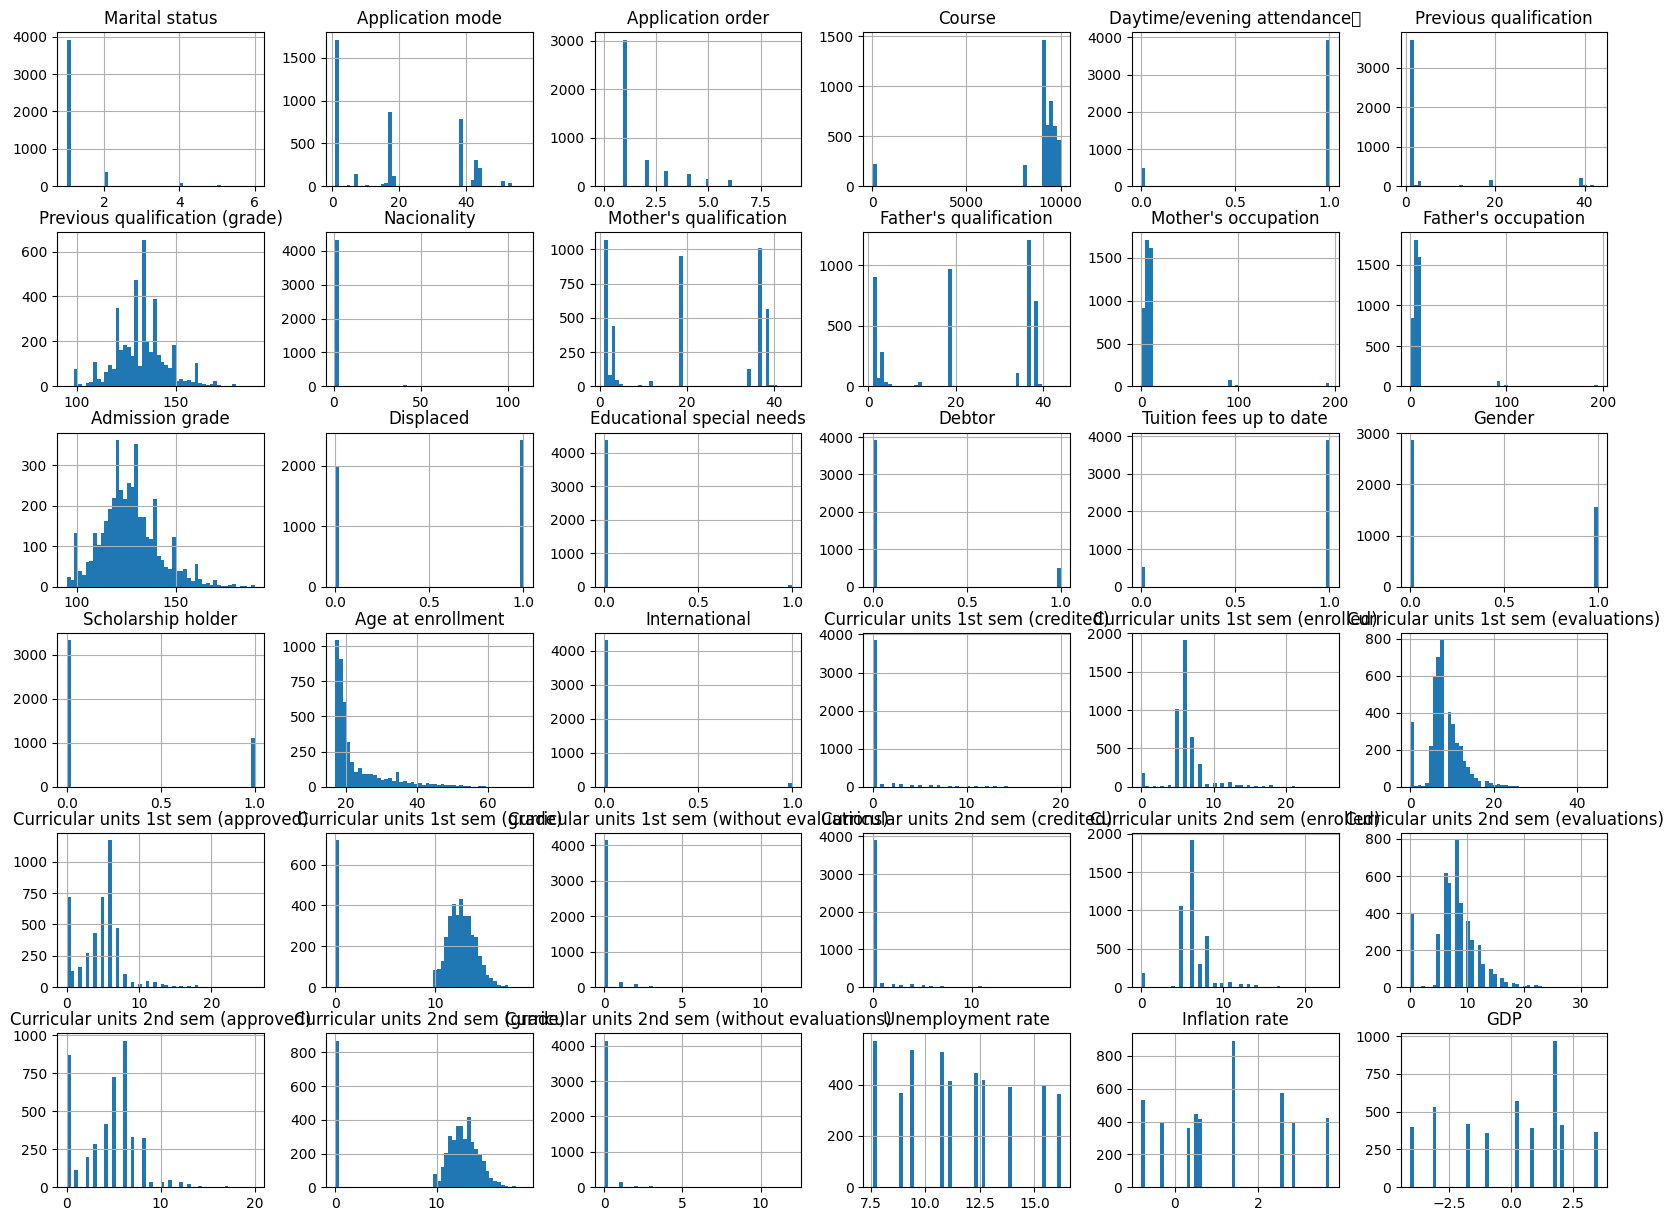

In [128]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Splitting the dataset in train and test sets

In [129]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = .2, random_state = 42)

In [130]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

Prepare the Data for Machine Learning Algorithms

In [131]:
df_ll = strat_train_set.drop("Target", axis = 1)
df_labels = strat_train_set["Target"].copy()

Data Preprocessing

```



Solving the issue of imbalance dataset
Based on our problem, we have three-category classification task and there seem to be imbalance in this category


In [132]:
df["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [133]:
cat_attribs = ["Target"]
df["Target"] = df[cat_attribs].astype("category")

In [134]:
df["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

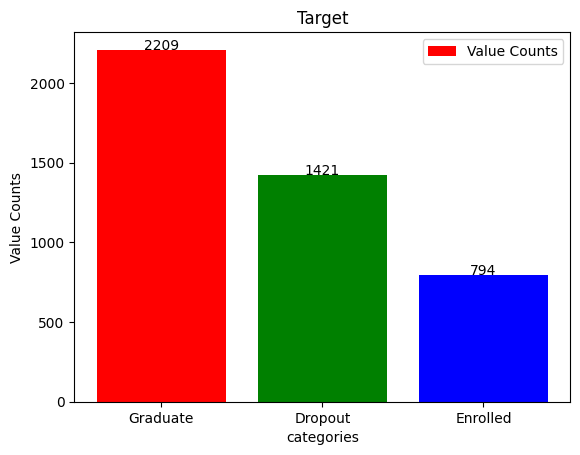

In [135]:
categories = ["Graduate", "Dropout", "Enrolled"]
value_counts = [2209, 1421, 794]
#create a bar plot
colors = ["red", "green", "blue"]
plt.bar(categories, value_counts, color = colors)
plt.xlabel("categories")
plt.ylabel("Value Counts")
plt.title("Target")
plt.legend(["Value Counts"])
for i, v in enumerate(value_counts):
  plt.text(i, v + i, str(v), ha = "center")
plt.show()

In [136]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [137]:
grouped = df["Gender"].groupby(df["Target"])

In [138]:
grouped.value_counts()

Target    Gender
Dropout   0          720
          1          701
Enrolled  0          487
          1          307
Graduate  0         1661
          1          548
Name: Gender, dtype: int64

In [139]:
grouped = df["Scholarship holder"].groupby(df["Target"])

In [140]:
grouped.value_counts()
# 0 signifies no scholarship holder
#1 signigies yes scholarship holder

Target    Scholarship holder
Dropout   0                     1287
          1                      134
Enrolled  0                      664
          1                      130
Graduate  0                     1374
          1                      835
Name: Scholarship holder, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

Checking for multicollinearity

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


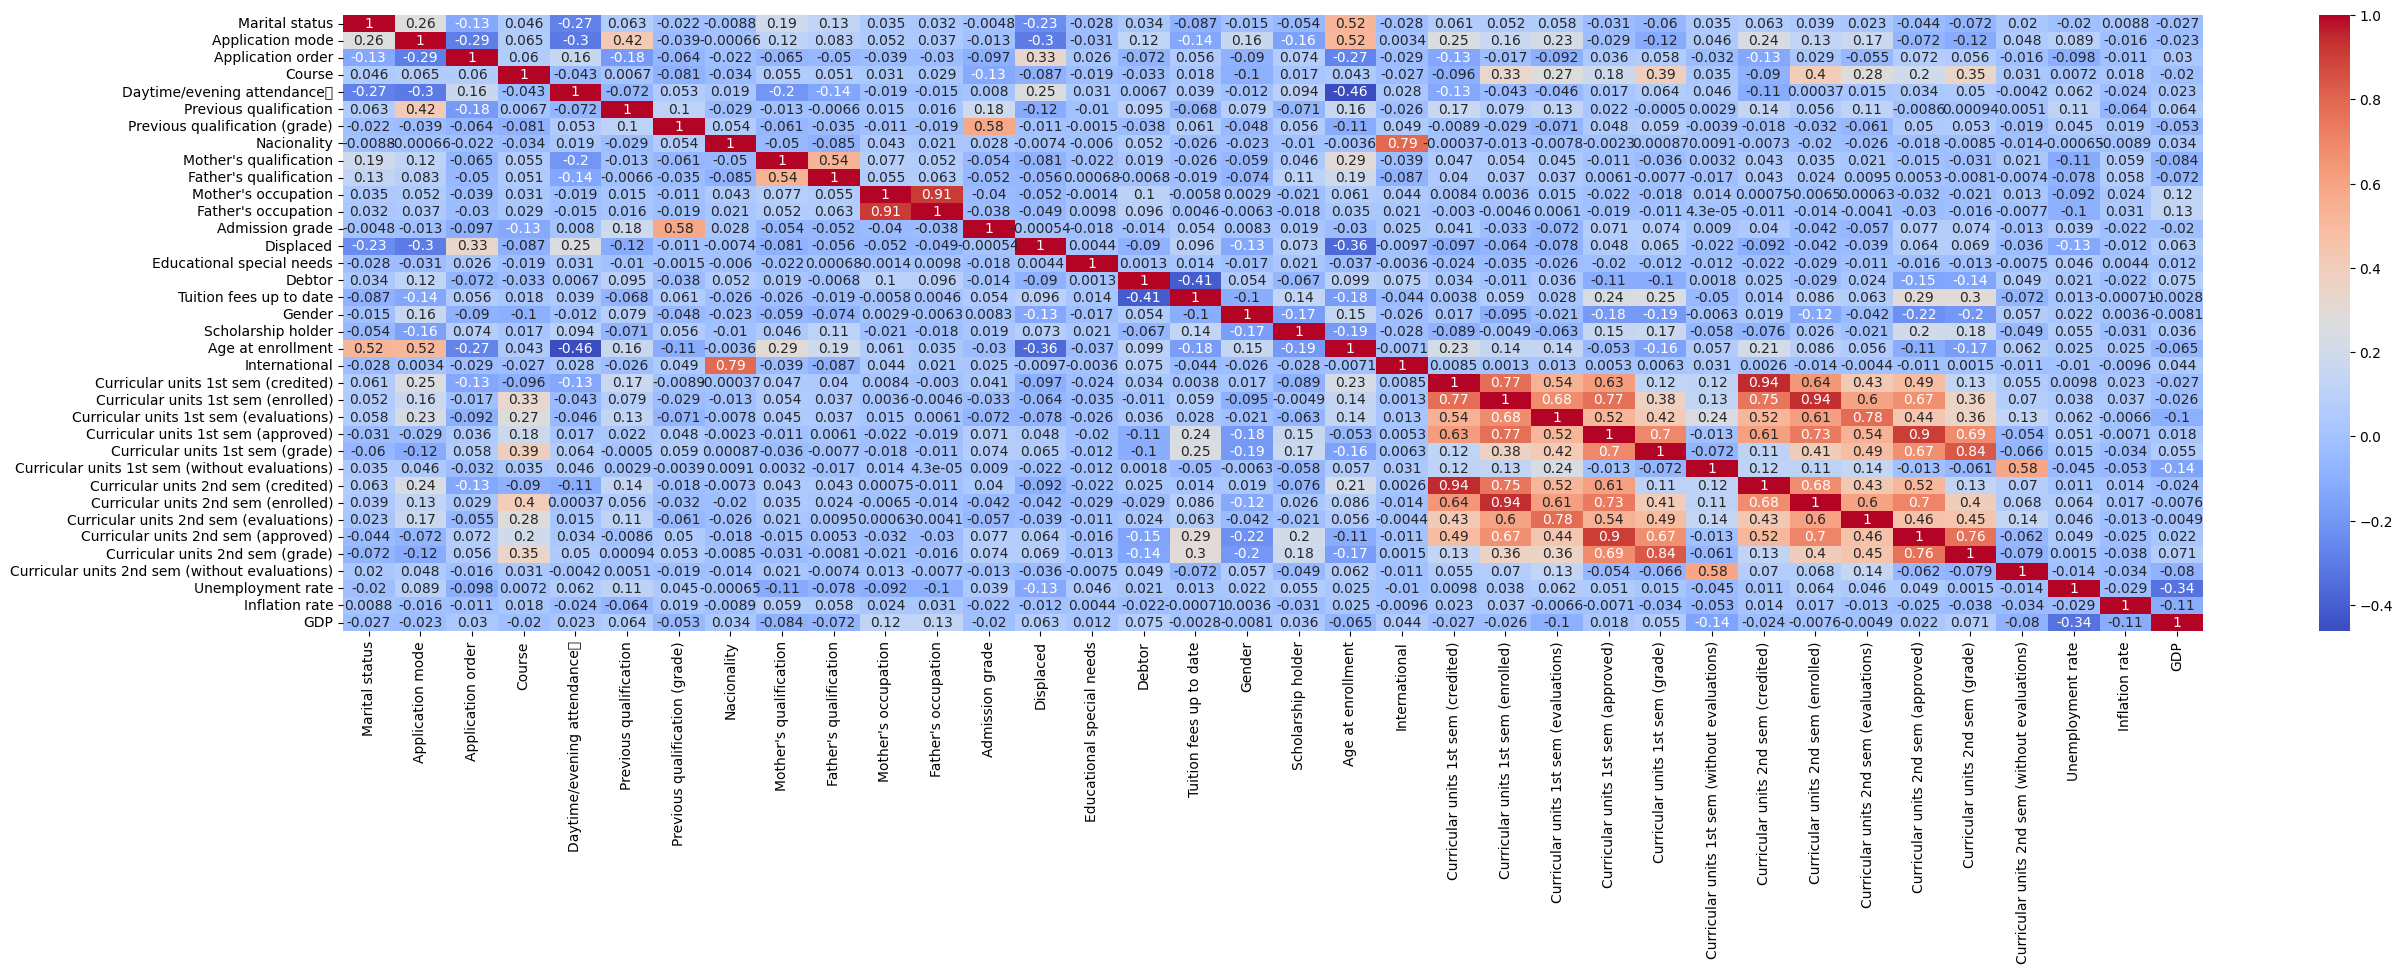

In [153]:
predictors = df.drop("Target", axis = 1)
corr = predictors.corr()
#import statsmodels.graphics.api as sm
plt.figure(figsize = (30, 8))
import seaborn as sns
#sm.plot_corr(corr, xnames = list(corr.columns))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()



Multicolinearity exists with pearson correlation coefficient greater than 0.7. The correlation is strongest between features in the same group such Nationality and International and Mother's Occupation and father's occupatio



In [163]:

#some predictors
high_correlation_features = set()
for i in range(len(corr.columns)):
  for j in range(i):
    if abs(corr.iloc[i,j]) > 0.7:
      feature_i = corr.columns[i]
      feature_j = corr.columns[j]
      high_correlation_features.add(feature_i)
#Remove the features with high collinearity
data_without_collinear_features = predictors.drop(high_correlation_features, axis = 1)
#Printing the remaining features
remaining_features = data_without_collinear_features.columns
print("Remaining Features:", remaining_features)

Remaining Features: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


In [166]:
correlation_threshold = 0.7
#Finding highly correlated features
highly_correlated_features = []
for i in range(len(corr.columns)):
  for j in range(i+1, len(corr.columns)):
    if abs(corr.iloc[i,j]) >= correlation_threshold:
      feature_i = corr.columns[i]
      feature_j = corr.columns[j]
      highly_correlated_features.append((feature_i, feature_j, corr.iloc[i,j]))
#print
for feature_i, feature_j, correlation in highly_correlated_features:
  print(f"{feature_i} - {feature_j}: {correlation}")

Nacionality - International: 0.7909349101784291
Mother's occupation - Father's occupation: 0.910472107644332
Curricular units 1st sem (credited) - Curricular units 1st sem (enrolled): 0.7743441891168912
Curricular units 1st sem (credited) - Curricular units 2nd sem (credited): 0.9448110366582713
Curricular units 1st sem (enrolled) - Curricular units 1st sem (approved): 0.7690834766824151
Curricular units 1st sem (enrolled) - Curricular units 2nd sem (credited): 0.7537467053534808
Curricular units 1st sem (enrolled) - Curricular units 2nd sem (enrolled): 0.942626693015919
Curricular units 1st sem (evaluations) - Curricular units 2nd sem (evaluations): 0.7788631362482398
Curricular units 1st sem (approved) - Curricular units 2nd sem (enrolled): 0.7337718828670937
Curricular units 1st sem (approved) - Curricular units 2nd sem (approved): 0.9040021013038965
Curricular units 1st sem (grade) - Curricular units 2nd sem (grade): 0.8371697405958258
Curricular units 2nd sem (enrolled) - Curricul

#Feature Importance using permutation feature importance
Permutation feature importance is a technique used to evaluate the importance
of each feature in a predictive model. It works by permuting the values of a single feature while keeping the other features unchanged, and then measuring the resulting decrease in model performance. The greater the decrease in performace, the more important the feature is considered.


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

X = df.drop("Target", axis = 1)
y = df.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a randomforest classifier
model = RandomForestClassifier()
#fitting
model.fit(X_train, y_train)
#calculating permutation features
result = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

Marital status: -2.2204460492503132e-17
Application mode: 0.006101694915254208
Application order: 0.0019209039548022445
Course: 0.01129943502824855
Daytime/evening attendance	: 0.000564971751412413
Previous qualification: 0.0012429378531073287
Previous qualification (grade): 0.002598870056497149
Nacionality: 0.0
Mother's qualification: 0.001807909604519742
Father's qualification: 0.0007909604519773739
Mother's occupation: 0.00033898305084743006
Father's occupation: 0.0007909604519773627
Admission grade: 0.00519774011299432
Displaced: 0.0019209039548022332
Educational special needs: -1.1102230246251566e-17
Debtor: 0.003841807909604489
Tuition fees up to date: 0.04045197740112992
Gender: 0.0032768361581920757
Scholarship holder: 0.007231638418079067
Age at enrollment: 0.010621468926553645
International: -0.0001129943502824915
Curricular units 1st sem (credited): 0.001807909604519742
Curricular units 1st sem (enrolled): 0.01005649717514121
Curricular units 1st sem (evaluations): 0.0079096

In [174]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [178]:

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.inspection import permutation_importance

X = df.drop("Target", axis = 1)
y = df.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a catboostclassifier
model = CatBoostClassifier()
#fitting
model.fit(X_train, y_train)
#calculating permutation features
result = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

Learning rate set to 0.084395
0:	learn: 1.0298620	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.9802399	total: 81.8ms	remaining: 40.8s
2:	learn: 0.9363665	total: 96.3ms	remaining: 32s
3:	learn: 0.8990005	total: 111ms	remaining: 27.7s
4:	learn: 0.8640757	total: 126ms	remaining: 25s
5:	learn: 0.8337294	total: 139ms	remaining: 23.1s
6:	learn: 0.8101160	total: 154ms	remaining: 21.8s
7:	learn: 0.7872525	total: 168ms	remaining: 20.8s
8:	learn: 0.7665411	total: 182ms	remaining: 20.1s
9:	learn: 0.7472077	total: 199ms	remaining: 19.7s
10:	learn: 0.7308264	total: 214ms	remaining: 19.2s
11:	learn: 0.7186101	total: 227ms	remaining: 18.7s
12:	learn: 0.7081914	total: 241ms	remaining: 18.3s
13:	learn: 0.6965181	total: 255ms	remaining: 18s
14:	learn: 0.6850763	total: 268ms	remaining: 17.6s
15:	learn: 0.6735922	total: 284ms	remaining: 17.5s
16:	learn: 0.6653678	total: 301ms	remaining: 17.4s
17:	learn: 0.6565862	total: 315ms	remaining: 17.2s
18:	learn: 0.6489994	total: 328ms	remaining: 17s
19:	learn: 0.642

In [100]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
pipeline = Pipeline([
    ("smote", SMOTE()),
    ("scaler", StandardScaler())
])